![logo](https://github.com/Columbia-Neuropythonistas/IntroPythonForNeuroscientists2023/assets/65978061/138766b5-ac36-4dc8-b9d4-bf512ecebe78)

# **Week 8 Supplement** Practicing data visualization and OOP

Let's run the code below to set things up. We'll also load in our data.

In [2]:
#remember that when we use 'as', we are simply telling Python what term we want to refer to our imported packages by
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#this does some important stuff behind the scenes for plotting specifically for jupyter notebooks (same in vscode), ask us if you want to learn more
%matplotlib inline 

data = pd.read_csv('SST_data.csv')
data

,dF/F,time_from_stim,cell_id,exposure,trial_id,omitted,pupil_area,mean_response
0,0.213396,-1.228129,1086500633,familiar,24,False,5636.081391,0.055830
1,-0.096333,-1.195810,1086500633,familiar,24,False,5636.081391,0.055830
2,-0.117812,-1.163491,1086500633,familiar,24,False,5636.081391,0.055830
3,0.096526,-1.131172,1086500633,familiar,24,False,5636.081391,0.055830
4,-0.000783,-1.098852,1086500633,familiar,24,False,5636.081391,0.055830
...,...,...,...,...,...,...,...,...
689770,-0.116568,1.357393,1086500770,novel,4802,False,7985.740772,-0.040271
689771,-0.011238,1.389711,1086500770,novel,4802,False,7985.740772,-0.040271
689772,0.057402,1.422030,1086500770,novel,4802,False,7985.740772,-0.040271
689773,0.114362,1.454349,1086500770,novel,4802,False,7985.740772,-0.040271


## Problem 1

Let's begin with a simple excercise: how would you find the number of trials in this dataset?

<details>
<summary>Click here for hint</summary>
Take a look at what we did above for cell_id - how would you do the same for trial_id, and how do you count the number of values in an array?
</details>

In [3]:
len(data.trial_id.unique())

739

## Figure aesthetics

Ok, switching gears now - let's cover some more Seaborn details! We'll begin by discussing figure aesthetics. Raw seaborn plots look ... not bad. It is nice to have more control, though. Let's start with setting styles and contexts. I'm gonna use another plot type - this one shows individual datapoints.


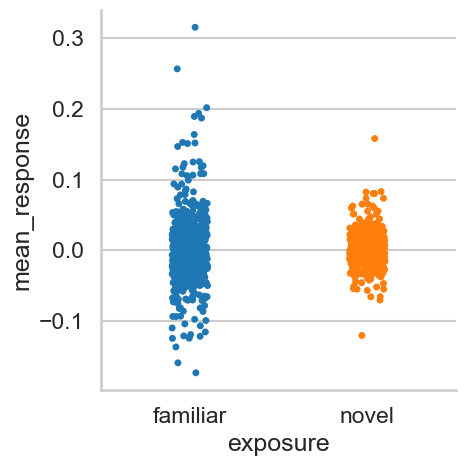

In [6]:
sns.set_style("whitegrid")
sns.set_context('talk')

data_sample = data.sample(1000)

sns.catplot(data = data_sample, x = 'exposure', y = 'mean_response')

Notice what changing `set_style` does to what the figure looks like.

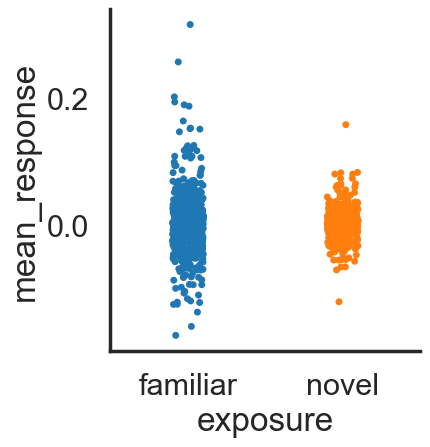

In [7]:
sns.set_style("white")
sns.set_context('poster')
sns.catplot(data = data_sample, x = 'exposure', y = 'mean_response')

We can also change the size of points by adding an `s` parameter.

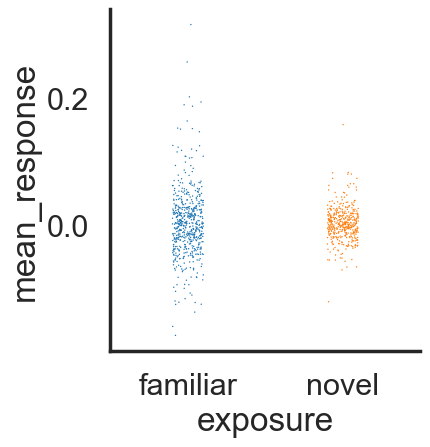

In [8]:
sns.set_style("white")
sns.set_context('poster')
sns.catplot(data = data_sample, x = 'exposure', y = 'mean_response', s = 1)

### Colors!

Seaborn has tons of colors and palettes available. If you're interested in learning about them, feel free to look at the documentation. Colors can be applied across all points, or a `palette` can be used, which assigns similar colors to different datasets.

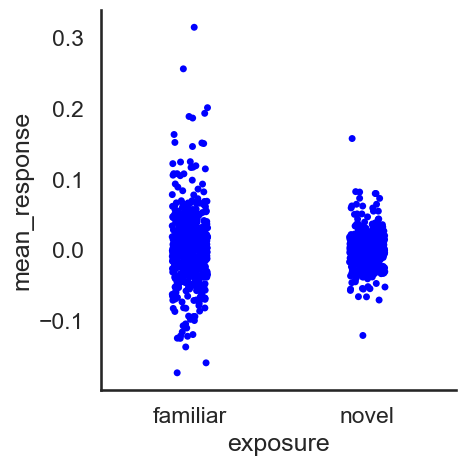

In [9]:
sns.set_context('talk')
sns.catplot(data = data_sample, x = 'exposure', y = 'mean_response', color = 'blue')

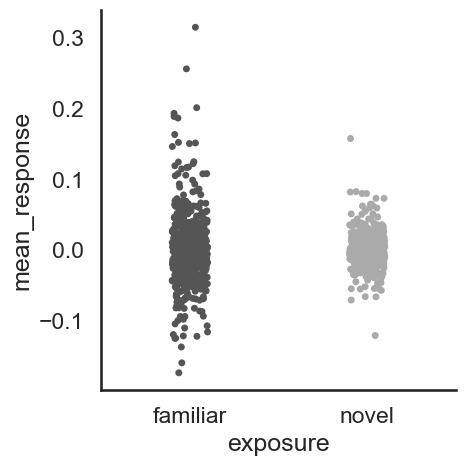

In [10]:
sns.set_context('talk')
sns.catplot(data = data_sample, x = 'exposure', y = 'mean_response', palette = 'gray')

#### Labels
Say we want to change the names of some of our labels. There are a few ways to do this, but the easiest is to interface with **matplotlib**


Text(0.5, 1.0, 'My first seaborn plot title!')

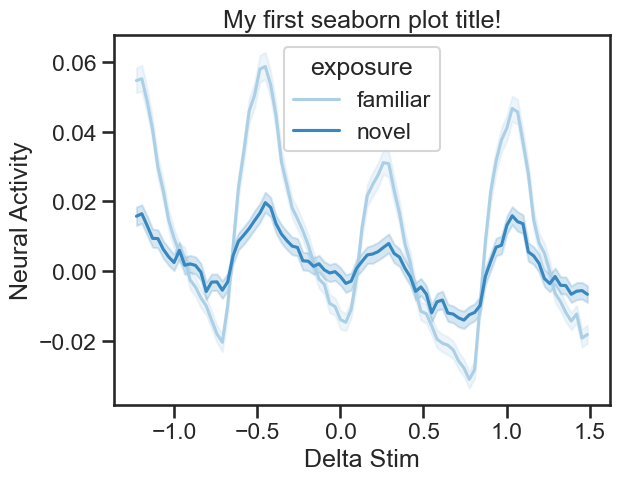

In [13]:
sns.set_style('ticks')

sns.lineplot(data = data, x = 'time_from_stim', y = 'dF/F', hue = 'exposure', palette = 'Blues')
plt.xlabel('Delta Stim')
plt.ylabel('Neural Activity')
plt.title('My first seaborn plot title!')

#### Figure size

It is possible to change figure size using the commands below. Play around with the numbers to try and change the size!

Text(0.5, 1.0, 'My first seaborn plot title!')

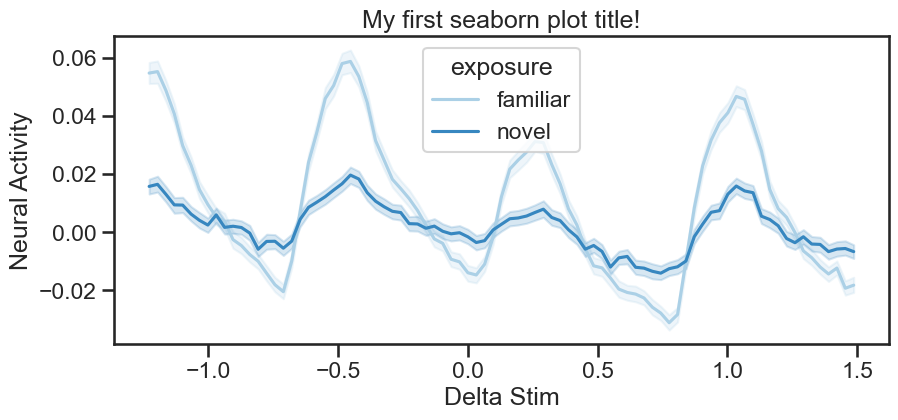

In [17]:
plt.figure(figsize=(10,4))
sns.lineplot(data = data, x = 'time_from_stim', y = 'dF/F', hue = 'exposure', palette = 'Blues')
plt.xlabel('Delta Stim')
plt.ylabel('Neural Activity')
plt.title('My first seaborn plot title!')

#### Multiple plots in one figure

`relplot` allows us to make tons of plots within a single figure, using the `col` and `row` commands. Again, play around with this!

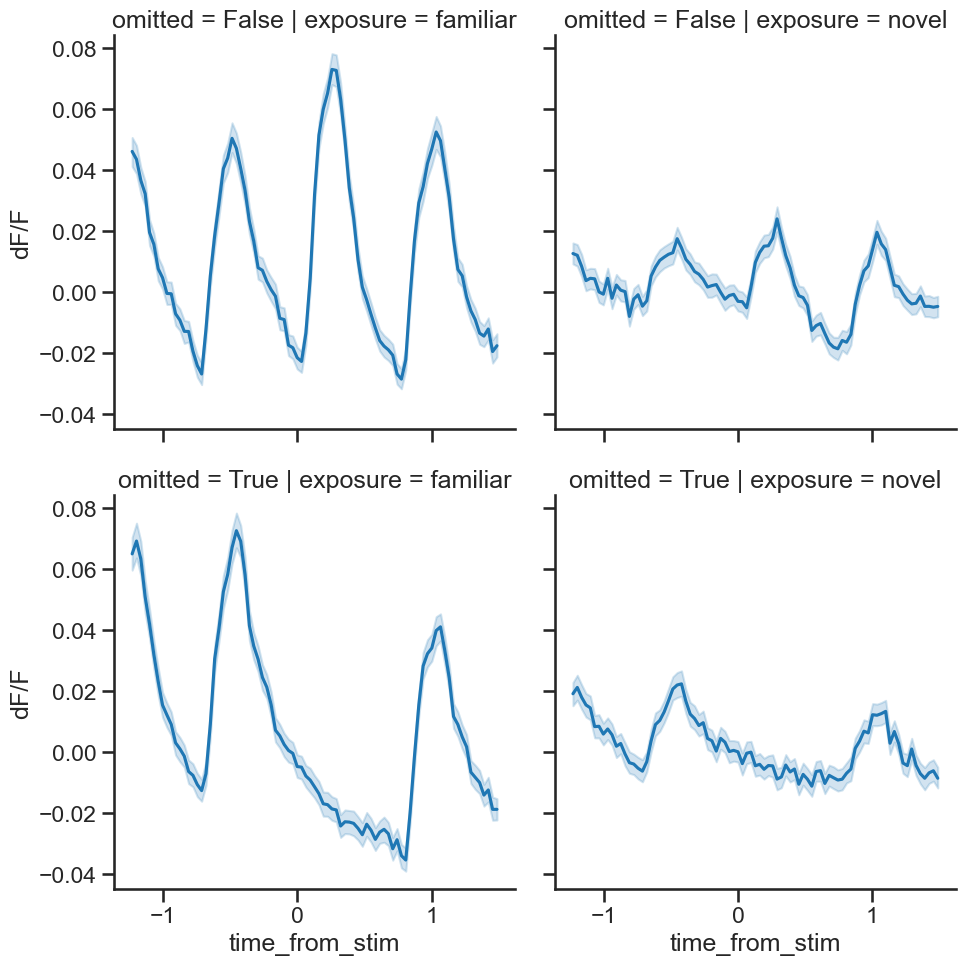

In [18]:
sns.relplot(data = data, kind = 'line', x = 'time_from_stim', y = 'dF/F', col = 'exposure', row = 'omitted')

## Problem 2
1) Take one of the graphs we've created in this notebook and change: <br>
    a) colors - find a colorblind friendly palette for me ;) <br>
    b) labels - what would you want the x and y axes to say? <br>
    c) title - up to you <br>
    d) CHALLENGE_1: modify the legend, if there is one on the graph - can you change the bounding box color/style? <br>
    e) CHALLENGE_2: can you figure out a way to change the font of your graphs? <br>

    Feel free to use the documentation as a guide, and google away! If you can't figure it out by next class, feel free to ask us!

## Abstraction - switching gears back to OOP
Let us extend some of these ideas we learned in class about OOP a little further. What if you wanted to create a parent class that was really a template of a class? First, let me provide an example of why you would want to do this. Let's take the example of a recipe for making a cake (your parent class). You might want to create a recipe, and include a step to put in all your flavorings, but leave the implementation of these flavorings up to the user. In your recipe, you would reference adding your flavorings, but you would not specify what to add. In a similar way, abstraction allows you to create methods that you might use via other methods in your parent class, but wait until creating child classes to implment their specifics. Let's see what this entails before considering a more real-world example.

In [32]:
#Run this code to load the class
from abc import ABC, abstractmethod
from datetime import date

class Experiment(ABC):
        
    def __init__(self, path_to_expt, expt_date, experimenter):
        self.path_to_expt = path_to_expt
        self.expt_date = expt_date
        self.experimenter = experimenter
        self.generated_date = date.today()
    
    @abstractmethod
    def print_expt_info(self):
        pass

Check out that @abstractmethod tag we used: this will tell python that this is an abstract method that can not be used on its own. Let's see what happens if we try and instantiate an experiment object. In addition, we inherit from ABC, but let's not delve too deeply into that right now. Email us or ask before class if you're curious!

In [33]:
expt = Experiment('12.csv', '12312312', 'bob')
expt.print_expt_info()

TypeError: Can't instantiate abstract class Experiment with abstract method print_expt_info

In [34]:
class MolecularExperiment(Experiment):
    
    def __init__(self, path_to_expt, expt_date, experimenter, gene):
        self.gene = gene
        super().__init__(path_to_expt, expt_date, experimenter)
    
    def print_expt_info(self):
        print('Path: ', self.path_to_expt)
        print('Experiment Date: ', self.expt_date)
        print('Experimenter: ', self.experimenter)
        print('Generation Date: ', self.generated_date)
        print('Gene: ', self.gene)

In [35]:
imaging_expt = MolecularExperiment('experiment_file.csv', '031322', 'Abhi', 'c-Fos')
imaging_expt.print_expt_info()

Path:  experiment_file.csv
Experiment Date:  031322
Experimenter:  Abhi
Generation Date:  2023-10-25
Gene:  c-Fos


In [36]:
Experiment.print_expt_info(imaging_expt)

To sum things up from class and this homework, OOP provides 1) a user-friendly way to organize code 2) modularity and 3) a simple way to work with similar but distinct data. Of course, OOP is not without issues; OOP can obfuscate and hide what's going on under the hood, and sometimes objects can be modified without you really knowing that you were modifying any object. Next week, we'll see some examples of OOP used in python packages, as well as how to read OOP code in packages!